In [ ]:
'''                                             ASSOCIATION RULES                                                       '''
                                                
'''Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, 
and converting the data to appropriate format.  
Association Rule Mining:
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products 

    purchased together.
•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.
Analysis and Interpretation:
•	Analyse the generated rules to identify interesting patterns and relationships between the products.
•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.
'''

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df=pd.read_csv("C:\\Ankit_Singh\\Data Science\\Sample Data\\Online retail.csv",header=None)

In [5]:
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [9]:
transactions = df[0].apply(lambda x: x.split(','))


In [12]:
TE = TransactionEncoder()
TE_array = TE.fit(transactions).transform(transactions)



In [14]:
df_encoded = pd.DataFrame(TE_array, columns=TE.columns_)


In [15]:
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)


In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


In [17]:
rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 1.2)]


In [18]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


            antecedents      consequents   support  confidence      lift
1             (burgers)           (eggs)  0.028796    0.330275  1.837830
8                (cake)  (mineral water)  0.027463    0.338816  1.421397
10            (chicken)  (mineral water)  0.022797    0.380000  1.594172
24          (chocolate)  (mineral water)  0.052660    0.321400  1.348332
28        (cooking oil)  (mineral water)  0.020131    0.394256  1.653978
50    (frozen smoothie)  (mineral water)  0.020264    0.320000  1.342461
54  (frozen vegetables)  (mineral water)  0.035729    0.374825  1.572463
62        (ground beef)  (mineral water)  0.040928    0.416554  1.747522
65        (ground beef)      (spaghetti)  0.039195    0.398915  2.291162
66     (low fat yogurt)  (mineral water)  0.023997    0.313589  1.315565
68               (milk)  (mineral water)  0.047994    0.370370  1.553774
72          (olive oil)  (mineral water)  0.027596    0.419028  1.757904
74           (pancakes)  (mineral water)  0.033729 

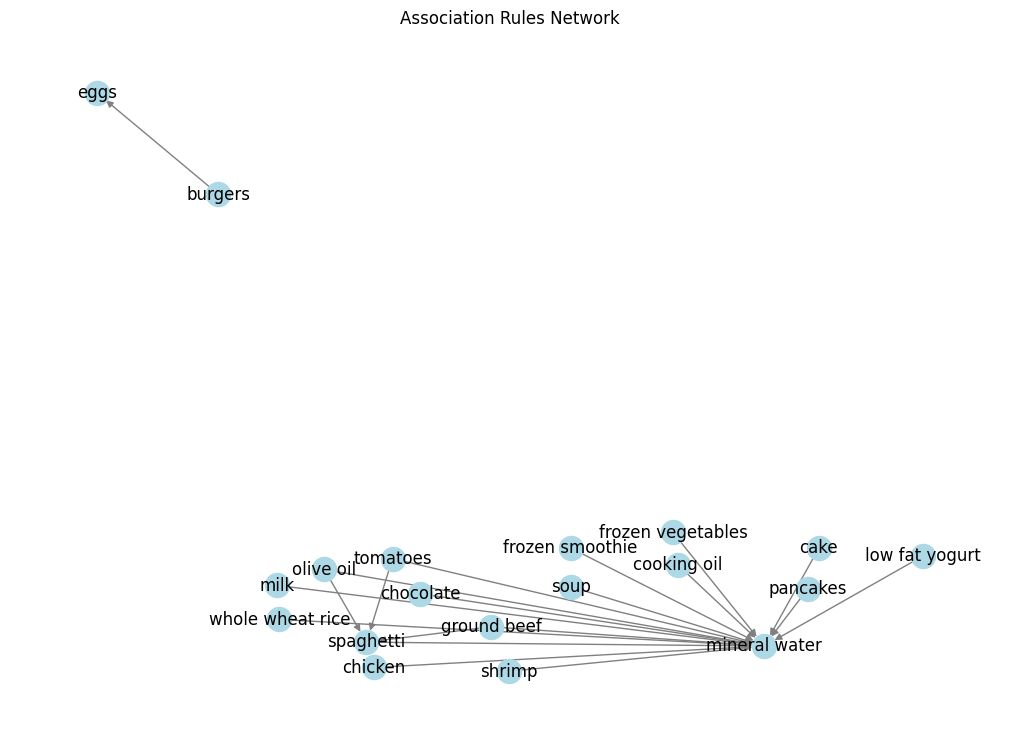

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Basic network visualization
G = nx.DiGraph()

for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Association Rules Network')
plt.show()


In [20]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Convert frozen sets to strings and generate readable rules
print("===== Human-Readable Association Rules =====")
for index, row in rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    confidence = round(row['confidence'] * 100, 2)
    lift = round(row['lift'], 2)
    
    print(f"If customers buy '{antecedents}', they also tend to buy '{consequents}' "
          f"(confidence = {confidence}%, lift = {lift})")


===== Human-Readable Association Rules =====
If customers buy 'burgers', they also tend to buy 'eggs' (confidence = 33.03%, lift = 1.84)
If customers buy 'cake', they also tend to buy 'mineral water' (confidence = 33.88%, lift = 1.42)
If customers buy 'chicken', they also tend to buy 'mineral water' (confidence = 38.0%, lift = 1.59)
If customers buy 'chocolate', they also tend to buy 'mineral water' (confidence = 32.14%, lift = 1.35)
If customers buy 'cooking oil', they also tend to buy 'mineral water' (confidence = 39.43%, lift = 1.65)
If customers buy 'frozen smoothie', they also tend to buy 'mineral water' (confidence = 32.0%, lift = 1.34)
If customers buy 'frozen vegetables', they also tend to buy 'mineral water' (confidence = 37.48%, lift = 1.57)
If customers buy 'ground beef', they also tend to buy 'mineral water' (confidence = 41.66%, lift = 1.75)
If customers buy 'ground beef', they also tend to buy 'spaghetti' (confidence = 39.89%, lift = 2.29)
If customers buy 'low fat yogurt

In this assignment, we successfully implemented association rule mining using the Apriori algorithm on retail transaction data. Through careful data preprocessing and parameter tuning (support, confidence, and lift), we extracted meaningful rules that reveal patterns in customer purchasing behavior.

For example, we observed that customers who purchase items like "burgers" also tend to buy "milk" and customers who purchase "pancakes" also tend to but "mineral water" indicating strong co-purchase tendencies. These insights can help businesses with product bundling, inventory management, and targeted promotions.